## BSPF Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import obspy as obs

import matplotlib.pyplot as plt

In [16]:
from functions.compute_orthogonal_distance_regression import __compute_orthogonal_distance_regression
from functions.compute_linear_regression import __compute_linear_regression

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [3]:
config = {}

config['path_to_data'] = data_path+"BSPF/data/"
config['path_to_data'] = "~/Desktop/BSPF/data/"

config['path_to_catalogs'] = data_path+"BSPF/data/catalogs/"

config['datafile'] = "BSPF_events_analysis.pkl"

config['catalog'] = ""

## Load Data

In [4]:
data = pd.read_pickle(config['path_to_data']+config['datafile'])

## Modify Data

In [6]:
data['RPFO_H'] = np.sqrt(data.RPFO_BJN_Amax**2 + data.RPFO_BJE_Amax**2)
data['PFO_H'] = np.sqrt(data.PFO_BHN_Amax**2 + data.PFO_BHE_Amax**2)
data['BSPF_H'] = np.sqrt(data.BSPF_HJN_Amax**2 + data.BSPF_HJE_Amax**2)

Filter data

In [7]:
data2 = data[data.CoincidenceSum == 6]

In [8]:
scale = 1e6

x_array = data2.BSPF_HJZ_Amax*scale
y_array = 0.5*data2.PFO_H*scale

1023.1731122484983 -398.1304799734189


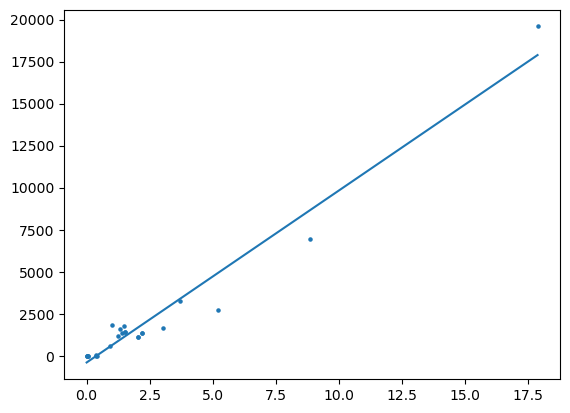

In [15]:
# b,a = __compute_orthogonal_distance_regression(x_array, y_array, xerr=None, yerr=None, bx=None, by=None)
b, a = __compute_linear_regression(x_array, y_array, intercept_is_zero=False)


x = np.linspace(x_array.min(), x_array.max(), 100)


plt.scatter(x_array, y_array, s=20, marker=".")
plt.plot(x, b*x+a)
print( b, a)

In [32]:
def __makeplot_velocity():
    
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    scale = 1e6
    msize = 10
    
    x, y = data.RPFO_BJZ_Amax*scale, 0.5*data.PFO_H*scale
    x_adr_syn = np.linspace(x.min(), x.max())
    a_adr, b_adr = __compute_linear_regression(x, y, intercept_is_zero=True)
    
    ax[0].scatter(data.RPFO_BJZ_Amax*scale, 0.5*data.PFO_H*scale, s=msize, label="ADR_L")
    ax[0].plot(x_adr_syn, a_adr*x_adr_syn+b_adr, "k")    
    
    x, y = data.BSPF_HJZ_Amax*scale, 0.5*data.PFO_H*scale
    x_bspf_syn = np.linspace(x.min(), x.max())
    a_bspf, b_bspf = __compute_linear_regression(x, y, intercept_is_zero=True)
    
    ax[0].scatter(data.BSPF_HJZ_Amax*scale, 0.5*data.PFO_H*scale, s=msize, label="BSPF")
    ax[0].plot(x_bspf_syn, a_bspf*x_bspf_syn+b_bspf, "k")    
    
    
    # ax[1].scatter(data.BSPF_H*scale, data.PFO_BHZ_Amax*scale, s=msize, label="BSPF")
    ax[1].scatter(data.RPFO_H*scale, data.PFO_BHZ_Amax*scale, s=msize, label="ADR_R")
    
    
    for i in range(2):
        # ax[i].set_yscale("log")
        # ax[i].set_xscale("log")
        ax[i].legend(loc=2)
        
    ax[0].set_xlim(0,1)
    ax[1].set_xlim(0,100)
    
    plt.show()

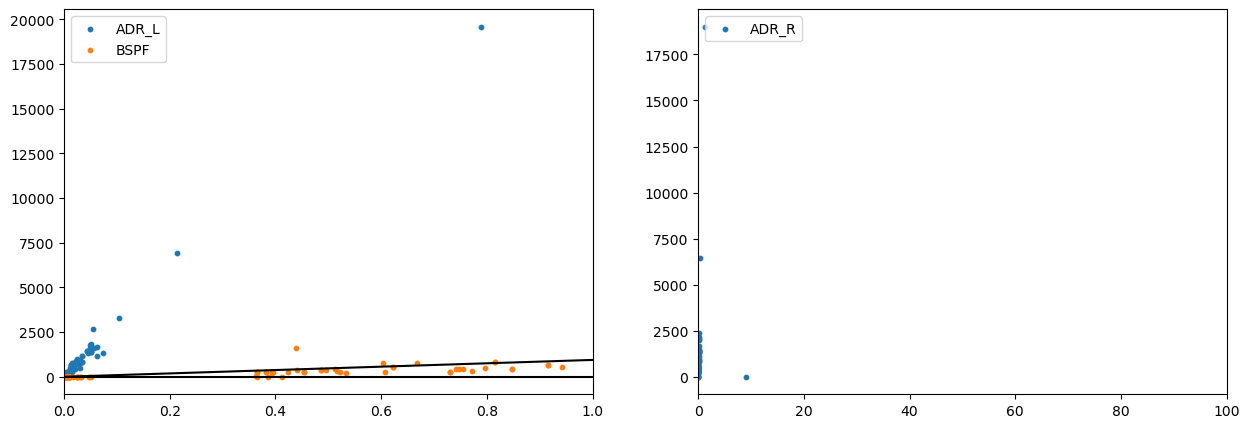

In [33]:
__makeplot_velocity()

In [18]:
def __makeplot_mag_amax():
    
    NJ = 3
    NI = 3
    
    fig, ax = plt.subplots(NJ, NI, figsize=(15,10))
    
    scale = 1e6
    msize = 12
    
    ## _________________________
    
    ax[0,0].scatter(data.Magnitude, data.PFO_BHZ_Amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,0].scatter(data2.Magnitude, data2.PFO_BHZ_Amax*scale, s=msize, label="XPFO Z")
    
    ax[0,1].scatter(data.Magnitude, data.PFO_BHN_Amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,1].scatter(data2.Magnitude, data2.PFO_BHN_Amax*scale, s=msize, label="XPFO N")
    
    ax[0,2].scatter(data.Magnitude, data.PFO_BHE_Amax*scale, s=msize, color="grey", alpha=0.7)
    ax[0,2].scatter(data2.Magnitude, data2.PFO_BHE_Amax*scale, s=msize, label="XPFO E")
    
    ## _________________________
    
    ax[1,0].scatter(data.Magnitude, data.RPFO_BJZ_Amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,0].scatter(data2.Magnitude, data2.RPFO_BJZ_Amax*scale, s=msize, label="ADR Z")
    
    ax[1,1].scatter(data.Magnitude, data.RPFO_BJN_Amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,1].scatter(data2.Magnitude, data2.RPFO_BJN_Amax*scale, s=msize, label="ADR N")
    
    ax[1,2].scatter(data.Magnitude, data.RPFO_BJE_Amax*scale, s=msize, color="grey", alpha=0.7)
    ax[1,2].scatter(data2.Magnitude, data2.RPFO_BJE_Amax*scale, s=msize, label="ADR E")
    
    ## _________________________
    
    ax[2,0].scatter(data.Magnitude, data.BSPF_HJZ_Amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,0].scatter(data2.Magnitude, data2.BSPF_HJZ_Amax*scale, s=msize, label="BSPF Z")
    
    ax[2,1].scatter(data.Magnitude, data.BSPF_HJN_Amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,1].scatter(data2.Magnitude, data2.BSPF_HJN_Amax*scale, s=msize, label="BSPF N")
    
    ax[2,2].scatter(data.Magnitude, data.BSPF_HJE_Amax*scale, s=msize, color="grey", alpha=0.7)
    ax[2,2].scatter(data2.Magnitude, data2.BSPF_HJE_Amax*scale, s=msize, label="BSPF E")
    
    
    
    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            # ax[i,j].set_xscale("log")
            ax[i,j].legend(loc=4)
    
    
    plt.show()

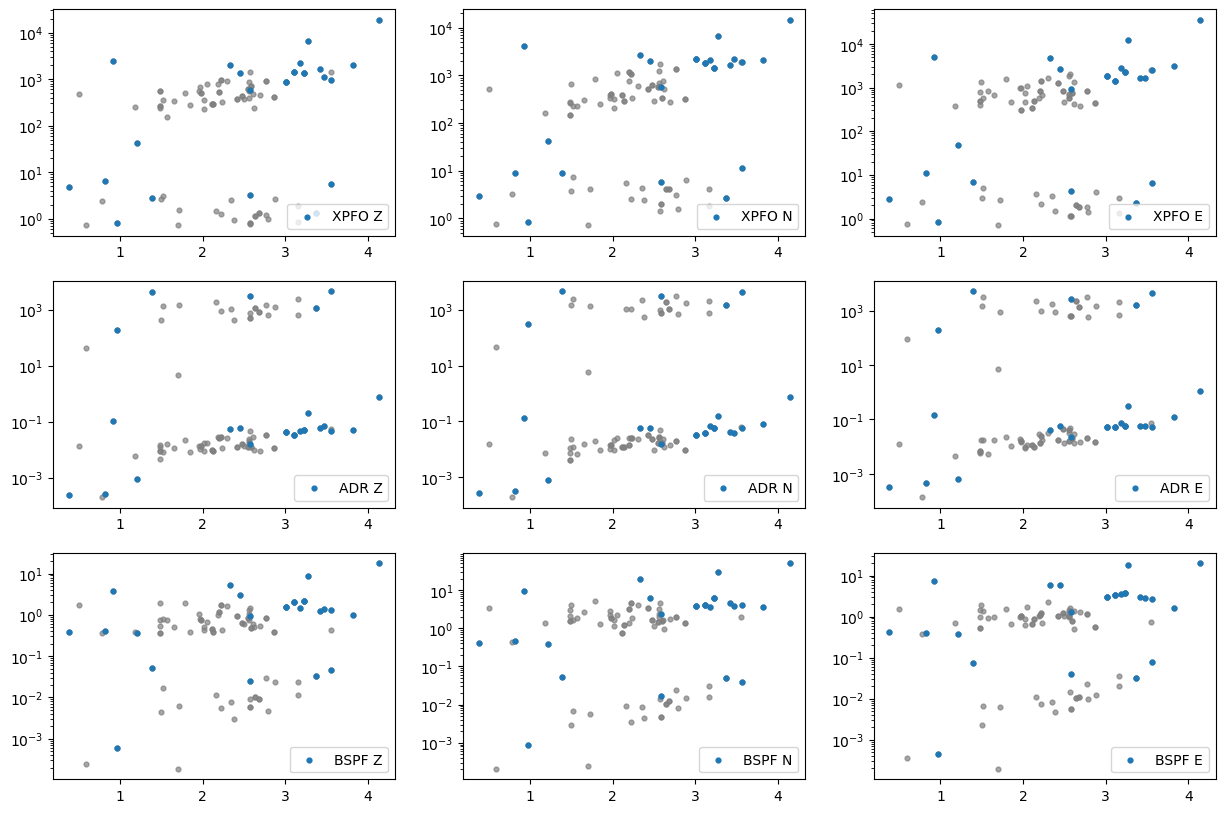

In [19]:
__makeplot_mag_amax()

In [ ]:
def __makeplot_mag_snr():
    
    NJ = 3
    NI = 3
    
    fig, ax = plt.subplots(NJ, NI, figsize=(15,10))
    
    scale = 1e6
    msize = 12
    
    ## _________________________
    
    ax[0,0].scatter(data.Magnitude, data.PFO_BHZ_SNR*scale, s=msize, color="grey", alpha=0.7)
    ax[0,0].scatter(data2.Magnitude, data2.PFO_BHZ_SNR*scale, s=msize, label="XPFO Z")
    
    ax[0,1].scatter(data.Magnitude, data.PFO_BHN_SNR*scale, s=msize, color="grey", alpha=0.7)
    ax[0,1].scatter(data2.Magnitude, data2.PFO_BHN_SNR*scale, s=msize, label="XPFO N")
    
    ax[0,2].scatter(data.Magnitude, data.PFO_BHE_SNR*scale, s=msize, color="grey", alpha=0.7)
    ax[0,2].scatter(data2.Magnitude, data2.PFO_BHE_SNR*scale, s=msize, label="XPFO E")
    
    ## _________________________
    
    ax[1,0].scatter(data.Magnitude, data.RPFO_BJZ_SNR*scale, s=msize, color="grey", alpha=0.7)
    ax[1,0].scatter(data2.Magnitude, data2.RPFO_BJZ_SNR*scale, s=msize, label="ADR Z")
    
    ax[1,1].scatter(data.Magnitude, data.RPFO_BJN_SNR*scale, s=msize, color="grey", alpha=0.7)
    ax[1,1].scatter(data2.Magnitude, data2.RPFO_BJN_SNR*scale, s=msize, label="ADR N")
    
    ax[1,2].scatter(data.Magnitude, data.RPFO_BJE_SNR*scale, s=msize, color="grey", alpha=0.7)
    ax[1,2].scatter(data2.Magnitude, data2.RPFO_BJE_SNR*scale, s=msize, label="ADR E")
    
    ## _________________________
    
    ax[2,0].scatter(data.Magnitude, data.BSPF_HJZ_SNR*scale, s=msize, color="grey", alpha=0.7)
    ax[2,0].scatter(data2.Magnitude, data2.BSPF_HJZ_SNR*scale, s=msize, label="BSPF Z")
    
    ax[2,1].scatter(data.Magnitude, data.BSPF_HJN_SNR*scale, s=msize, color="grey", alpha=0.7)
    ax[2,1].scatter(data2.Magnitude, data2.BSPF_HJN_SNR*scale, s=msize, label="BSPF N")
    
    ax[2,2].scatter(data.Magnitude, data.BSPF_HJE_SNR*scale, s=msize, color="grey", alpha=0.7)
    ax[2,2].scatter(data2.Magnitude, data2.BSPF_HJE_SNR*scale, s=msize, label="BSPF E")
    
    
    
    for i in range(NJ):
        for j in range(NI):
            ax[i,j].set_yscale("log")
            # ax[i,j].set_xscale("log")
            ax[i,j].legend(loc=2)
    
    plt.show()

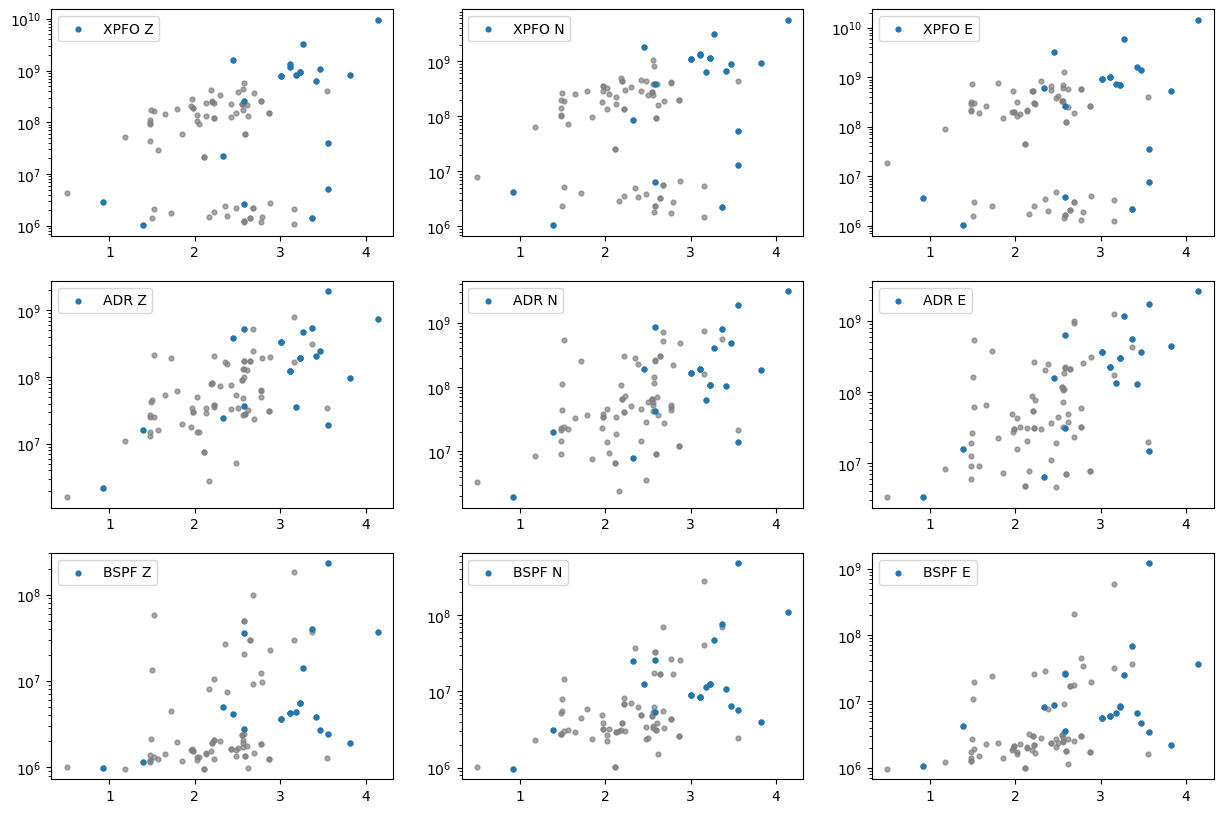

In [17]:
__makeplot_mag_snr()